In [1]:
#-- EDA tool--#
import numpy as np
import pandas as pd
import seaborn as sns

import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
font_name = fm.FontProperties(fname="C:/Windows/Fonts/malgun.ttf").get_name()
plt.rc("font", family=font_name)
import matplotlib as mlp
mlp.rcParams["axes.unicode_minus"] = False

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/auction/auction_final.csv")
df

,office,num,case_year,cat,addr,load_addr,dong,bunji,detail_dong,detail_ho,...,lowest,hammer,date,year,month,day,status,low_per,ham_per,comment
0,서울동부1계,2020-55340,2020,아파트,"서울특별시 성동구 성수동1가 718, 103동 29층2902호 (성수동1가,트리마제)",NaN,서울특별시 성동구 성수동1가,718,103동,2902호,...,2480000000,NaN,2021-08-02,2021,8,2,유찰1회,80,NaN,NaN
1,서울동부4계,2020-55715,2020,아파트,"서울특별시 성동구 홍익동 53, 101동 10층1005호 (홍익동,청계대주파크빌)",NaN,서울특별시 성동구 홍익동,53,101동,1005호,...,391000000,NaN,2021-08-09,2021,8,9,신건,100,NaN,토지및건물 지분매각
2,서울서부6계,2019-52798,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비312호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비312호,...,10720000,NaN,2021-08-10,2021,8,10,유찰13회,5,NaN,대항력있는임차인
3,서울서부3계,2019-54121,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비314호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비314호,...,13058000,NaN,2021-08-10,2021,8,10,유찰12회,7,NaN,대항력있는임차인
4,서울서부6계,2020-2843,2020,아파트,서울특별시 서대문구 홍제동 470 제일아파트 제101동 6층603호,NaN,서울특별시 서대문구 홍제동,470,제101동,603호,...,478000000,NaN,2021-08-10,2021,8,10,신건,100,NaN,"대지권미등기,대항력있는임차인"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,서울중앙4계,2018-92,2018,아파트,"서울 동작구 상도동 533, 상도엠코타운애스톤파크 211동 3층 302호",서울특별시 동작구 상도로 346-2,서울 동작구 상도동,533,211동,302호,...,938000000,1.054183e+09,2018-06-14,2018,6,14,배당종결,100,NaN,NaN
1091,서울남부4계,2018-609,2018,아파트,서울특별시 금천구 독산동 183-1,"서울특별시 금천구 독산로78다길 52, 7층704호",서울특별시 금천구 독산동,0,NaN,704호,...,254000000,2.541100e+08,2018-06-12,2018,6,12,배당종결,100,NaN,NaN
1092,서울북부4계,2018-619,2018,아파트,"서울특별시 성북구 삼선동2가 420,동 5층 505호","서울특별시 성북구 낙산길 243-15, 108동 5층505호",서울특별시 성북구 삼선동2가,420,108동,505호,...,507000000,5.350000e+08,2018-06-04,2018,6,4,배당종결,100,NaN,NaN
1093,서울북부6계,2018-633,2018,아파트,"서울특별시 중랑구 면목동 581,동 15층 1502호","서울특별시 중랑구 용마산로 285, 103동 15층1502호",서울특별시 중랑구 면목동,581,103동,1502호,...,481000000,4.890000e+08,2018-05-14,2018,5,14,배당종결,100,NaN,NaN


In [484]:
# hammer, ham_per 결측치 확인
print((np.isnan(df["hammer"])).value_counts())
print((np.isnan(df["ham_per"])).value_counts())

False    948
True     147
Name: hammer, dtype: int64
False    793
True     302
Name: ham_per, dtype: int64


In [485]:
# 매각이 완료되었음에도 hammer price가 결측치인 건 -> lowest price로 채움
# ham_per 결측치 -> hammer / price *100으로 채움
def hammer(df):
    for i in range(len(df)):
        if df.loc[i, "status"] in ("매각","배당종결"):
            if np.isnan(df.loc[i, "hammer"]):
                df.loc[i, "hammer"] = df.loc[i,"lowest"]
                df.loc[i, "ham_per"] = df.loc[i,"hammer"] / df.loc[i,"price"] *100
            elif np.isnan(df.loc[i, "ham_per"]):
                df.loc[i, "ham_per"] = df.loc[i,"hammer"] / df.loc[i,"price"] *100

In [486]:
# 결측치 채우기
hammer(df)

# 다시 확인
print((np.isnan(df["hammer"])).value_counts())
print((np.isnan(df["ham_per"])).value_counts())

False    1067
True       28
Name: hammer, dtype: int64
False    1067
True       28
Name: ham_per, dtype: int64


In [3]:
df.columns

Index(['office', 'num', 'case_year', 'cat', 'addr', 'load_addr', 'dong',
       'bunji', 'detail_dong', 'detail_ho', 'floor', 'brand', 'build_area',
       'land_area', 'price', 'lowest', 'hammer', 'date', 'year', 'month',
       'day', 'status', 'low_per', 'ham_per', 'comment'],
      dtype='object')

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 27 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   office       1095 non-null   object 
 1   num          1095 non-null   object 
 2   case_year    1095 non-null   int64  
 3   cat          1095 non-null   object 
 4   addr         1095 non-null   object 
 5   load_addr    374 non-null    object 
 6   dong         1095 non-null   object 
 7   bunji        1095 non-null   object 
 8   detail_dong  981 non-null    object 
 9   detail_ho    1088 non-null   object 
 10  floor        1090 non-null   float64
 11  brand        927 non-null    object 
 12  build_area   1094 non-null   float64
 13  land_area    1052 non-null   float64
 14  price        1095 non-null   int64  
 15  lowest       1095 non-null   int64  
 16  hammer       1067 non-null   float64
 17  date         1095 non-null   object 
 18  year         1095 non-null   int64  
 19  month 

In [487]:
# case_year -> categorical data로 변경
df["case_year"] = df["case_year"].astype("category")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1095 entries, 0 to 1094
Data columns (total 25 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   office       1095 non-null   object  
 1   num          1095 non-null   object  
 2   case_year    1095 non-null   category
 3   cat          1095 non-null   object  
 4   addr         1095 non-null   object  
 5   load_addr    374 non-null    object  
 6   dong         1095 non-null   object  
 7   bunji        1095 non-null   object  
 8   detail_dong  981 non-null    object  
 9   detail_ho    1088 non-null   object  
 10  floor        1090 non-null   float64 
 11  brand        927 non-null    object  
 12  build_area   1094 non-null   float64 
 13  land_area    1052 non-null   float64 
 14  price        1095 non-null   int64   
 15  lowest       1095 non-null   int64   
 16  hammer       1067 non-null   float64 
 17  date         1095 non-null   object  
 18  year         1095 non-null  

In [488]:
df.describe()

,floor,build_area,land_area,price,lowest,hammer,year,month,day,low_per,ham_per
count,1090.000000,1094.000000,1052.000000,1.095000e+03,1.095000e+03,1.067000e+03,1095.000000,1095.000000,1095.000000,1095.000000,1067.000000
mean,8.353211,86.121521,38.791167,7.290732e+08,6.520250e+08,7.430876e+08,2019.773516,6.530594,15.264840,89.233790,101.958929
std,6.257485,44.294671,23.718668,6.184863e+08,5.268990e+08,6.005160e+08,0.841036,3.198595,8.191448,13.668648,17.480243
min,-1.000000,6.720000,2.281000,2.500000e+07,1.072000e+07,2.030000e+07,2018.000000,1.000000,1.000000,5.000000,27.000000
25%,3.000000,59.670000,24.643750,3.480000e+08,3.010000e+08,3.500555e+08,2019.000000,4.000000,8.500000,80.000000,92.000000
50%,7.000000,84.760000,35.670000,5.660000e+08,5.160000e+08,6.061000e+08,2020.000000,6.000000,15.000000,100.000000,102.000000
75%,12.000000,113.047500,47.525025,9.000000e+08,8.320000e+08,9.112200e+08,2020.000000,9.000000,22.000000,100.000000,111.000000
max,40.000000,364.040000,223.000000,6.470000e+09,4.140800e+09,6.011000e+09,2021.000000,12.000000,31.000000,100.000000,202.000000


In [21]:
df.case_year.describe()

count     1095
unique       3
top       2019
freq       514
Name: case_year, dtype: int64

In [22]:
df["dong"].value_counts()

서울특별시 강서구 화곡동        32
서울특별시 노원구 상계동        30
서울특별시 동작구 사당동        25
서울특별시 동대문구 장안동       24
서울특별시 양천구 목동         20
                     ..
서울특별시 구로구 온수동         1
서울특별시 중구 충무로5가        1
서울특별시 성동구 금호동1가       1
서울특별시 서대문구 천연동        1
서울특별시 영등포구 영등포동2가     1
Name: dong, Length: 196, dtype: int64

In [161]:
# 전체 dong list 출력
x = df.dong.value_counts()
d = zip(x.index, x.values)
for i in d:
    print(i)

('서울특별시 강서구 화곡동', 31)
('서울특별시 노원구 상계동', 30)
('서울특별시 동작구 사당동', 25)
('서울특별시 동대문구 장안동', 23)
('서울특별시 양천구 목동', 20)
('서울특별시 구로구 구로동', 19)
('서울특별시 관악구 봉천동', 18)
('서울특별시 서초구 서초동', 17)
('서울특별시 관악구 신림동', 17)
('서울특별시 송파구 가락동', 17)
('서울특별시 도봉구 방학동', 17)
('서울특별시 서대문구 연희동', 16)
('서울특별시 노원구 월계동', 16)
('서울특별시 서대문구 홍은동', 16)
('서울특별시 노원구 공릉동', 16)
('서울특별시 양천구 신월동', 16)
('서울특별시 성북구 정릉동', 15)
('서울특별시 광진구 자양동', 14)
('서울특별시 강서구 방화동', 14)
('서울특별시 중랑구 면목동', 14)
('서울특별시 양천구 신정동', 14)
('서울특별시 은평구 진관동', 14)
('서울특별시 도봉구 창동', 13)
('서울특별시 구로구 고척동', 13)
('서울특별시 서대문구 홍제동', 13)
('서울특별시 서초구 방배동', 13)
('서울특별시 구로구 개봉동', 12)
('서울특별시 노원구 중계동', 12)
('서울특별시 중랑구 신내동', 12)
('서울특별시 강북구 미아동', 12)
('서울특별시 성북구 돈암동', 11)
('서울특별시 강동구 천호동', 11)
('서울특별시 강동구 암사동', 10)
('서울특별시 금천구 시흥동', 10)
('서울특별시 송파구 잠실동', 10)
('서울특별시 강동구 성내동', 10)
('서울특별시 송파구 방이동', 9)
('서울특별시 동작구 상도동', 9)
('서울특별시 영등포구 영등포동1가', 9)
('서울특별시 노원구 하계동', 9)
('서울특별시 성북구 하월곡동', 9)
('서울특별시 금천구 독산동', 8)
('서울특별시 도봉구 도봉동', 8)
('서울특별시 강남구 도곡동', 8)
('서울특별시 강남구 삼성동', 8)
('서울특별시 영등포구

In [162]:
# 주소에 '서울특별시'가 아닌, '서울'이라고 표기된 곳 주소 '서울특별시'로 바꿈
df.loc[(df["dong"].str.split().str[0]=="서울"), "dong"] = df.loc[(df["dong"].str.split().str[0]=="서울"), "dong"].str.replace("서울","서울특별시")

In [163]:
# 확인
x = df.dong.value_counts()
d = zip(x.index, x.values)
for i in d:
    print(i)

('서울특별시 강서구 화곡동', 32)
('서울특별시 노원구 상계동', 30)
('서울특별시 동작구 사당동', 25)
('서울특별시 동대문구 장안동', 24)
('서울특별시 양천구 목동', 20)
('서울특별시 관악구 봉천동', 20)
('서울특별시 구로구 구로동', 20)
('서울특별시 도봉구 방학동', 18)
('서울특별시 관악구 신림동', 18)
('서울특별시 송파구 가락동', 17)
('서울특별시 서초구 서초동', 17)
('서울특별시 서대문구 연희동', 16)
('서울특별시 노원구 공릉동', 16)
('서울특별시 서대문구 홍은동', 16)
('서울특별시 양천구 신월동', 16)
('서울특별시 노원구 월계동', 16)
('서울특별시 성북구 정릉동', 15)
('서울특별시 은평구 진관동', 14)
('서울특별시 중랑구 면목동', 14)
('서울특별시 양천구 신정동', 14)
('서울특별시 서초구 방배동', 14)
('서울특별시 강서구 방화동', 14)
('서울특별시 광진구 자양동', 14)
('서울특별시 도봉구 창동', 14)
('서울특별시 서대문구 홍제동', 13)
('서울특별시 구로구 개봉동', 13)
('서울특별시 구로구 고척동', 13)
('서울특별시 노원구 중계동', 12)
('서울특별시 중랑구 신내동', 12)
('서울특별시 강동구 천호동', 12)
('서울특별시 강북구 미아동', 12)
('서울특별시 성북구 돈암동', 11)
('서울특별시 금천구 시흥동', 11)
('서울특별시 송파구 잠실동', 10)
('서울특별시 강동구 암사동', 10)
('서울특별시 강동구 성내동', 10)
('서울특별시 동작구 상도동', 10)
('서울특별시 노원구 하계동', 9)
('서울특별시 송파구 방이동', 9)
('서울특별시 서초구 반포동', 9)
('서울특별시 용산구 이촌동', 9)
('서울특별시 영등포구 신길동', 9)
('서울특별시 성북구 하월곡동', 9)
('서울특별시 영등포구 영등포동1가', 9)
('서울특별시 금천구 독산동', 8)
('서울특별시 강남

In [26]:
df["floor"].describe()

count    1090.000000
mean        8.353211
std         6.257485
min        -1.000000
25%         3.000000
50%         7.000000
75%        12.000000
max        40.000000
Name: floor, dtype: float64

<AxesSubplot:>

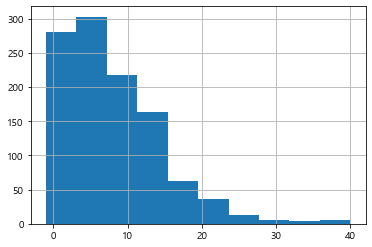

In [25]:
df.floor.hist()

In [164]:
# floor를 -1~3, 4~7, 8~12, 13~20, 21~ 으로 구분
df["floor_cat"] = pd.cut(df["floor"], bins=[-1,3,7,12,20,40], labels=["지하~3층","4~7층","8~12층","13~20층","21층 이상"])
df.head()

,office,num,case_year,cat,addr,load_addr,dong,bunji,detail_dong,detail_ho,...,hammer,date,year,month,day,status,low_per,ham_per,comment,floor_cat
0,서울동부1계,2020-55340,2020,아파트,"서울특별시 성동구 성수동1가 718, 103동 29층2902호 (성수동1가,트리마제)",NaN,서울특별시 성동구 성수동1가,718,103동,2902호,...,NaN,2021-08-02,2021,8,2,유찰1회,80,NaN,NaN,21층 이상
1,서울동부4계,2020-55715,2020,아파트,"서울특별시 성동구 홍익동 53, 101동 10층1005호 (홍익동,청계대주파크빌)",NaN,서울특별시 성동구 홍익동,53,101동,1005호,...,NaN,2021-08-09,2021,8,9,신건,100,NaN,토지및건물 지분매각,8~12층
2,서울서부6계,2019-52798,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비312호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비312호,...,NaN,2021-08-10,2021,8,10,유찰13회,5,NaN,대항력있는임차인,지하~3층
3,서울서부3계,2019-54121,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비314호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비314호,...,NaN,2021-08-10,2021,8,10,유찰12회,7,NaN,대항력있는임차인,지하~3층
4,서울서부6계,2020-2843,2020,아파트,서울특별시 서대문구 홍제동 470 제일아파트 제101동 6층603호,NaN,서울특별시 서대문구 홍제동,470,제101동,603호,...,NaN,2021-08-10,2021,8,10,신건,100,NaN,"대지권미등기,대항력있는임차인",4~7층


In [33]:
df["build_area"].describe()

count    1094.000000
mean       86.121521
std        44.294671
min         6.720000
25%        59.670000
50%        84.760000
75%       113.047500
max       364.040000
Name: build_area, dtype: float64

<AxesSubplot:>

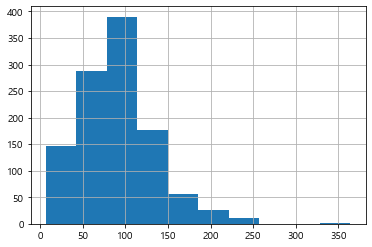

In [32]:
df.build_area.hist()

In [165]:
# 건물면적을 6~20, 21~60, 61~85, 86~150, 151~ 으로 구분
df["build_area_cat"] = pd.cut(df["build_area"], bins=[6,20,60,85,150,366], labels=["6~20m2","21~60m2","61~85m2","86~150m2","151m2 이상"])
df.head()

,office,num,case_year,cat,addr,load_addr,dong,bunji,detail_dong,detail_ho,...,date,year,month,day,status,low_per,ham_per,comment,floor_cat,build_area_cat
0,서울동부1계,2020-55340,2020,아파트,"서울특별시 성동구 성수동1가 718, 103동 29층2902호 (성수동1가,트리마제)",NaN,서울특별시 성동구 성수동1가,718,103동,2902호,...,2021-08-02,2021,8,2,유찰1회,80,NaN,NaN,21층 이상,61~85m2
1,서울동부4계,2020-55715,2020,아파트,"서울특별시 성동구 홍익동 53, 101동 10층1005호 (홍익동,청계대주파크빌)",NaN,서울특별시 성동구 홍익동,53,101동,1005호,...,2021-08-09,2021,8,9,신건,100,NaN,토지및건물 지분매각,8~12층,21~60m2
2,서울서부6계,2019-52798,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비312호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비312호,...,2021-08-10,2021,8,10,유찰13회,5,NaN,대항력있는임차인,지하~3층,6~20m2
3,서울서부3계,2019-54121,2019,아파트,"서울특별시 서대문구 연희동 194-30, 3층비314호 (연희동,브라운스톤 연희)",NaN,서울특별시 서대문구 연희동,194-30,NaN,비314호,...,2021-08-10,2021,8,10,유찰12회,7,NaN,대항력있는임차인,지하~3층,6~20m2
4,서울서부6계,2020-2843,2020,아파트,서울특별시 서대문구 홍제동 470 제일아파트 제101동 6층603호,NaN,서울특별시 서대문구 홍제동,470,제101동,603호,...,2021-08-10,2021,8,10,신건,100,NaN,"대지권미등기,대항력있는임차인",4~7층,61~85m2


In [166]:
# 토지면적 없음=0, 토지면적 있음=1 인 land column 생성
df["land"] = 0
df.loc[(df["land_area"]>0),"land"] = 1
df["land"].value_counts()

1    1052
0      43
Name: land, dtype: int64

<AxesSubplot:>

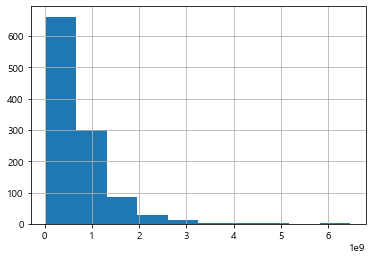

In [38]:
df.price.hist()

In [149]:
df.price.describe()

count    1.095000e+03
mean     7.290732e+08
std      6.184863e+08
min      2.500000e+07
25%      3.480000e+08
50%      5.660000e+08
75%      9.000000e+08
max      6.470000e+09
Name: price, dtype: float64

Text(0, 0.5, '낙찰가')

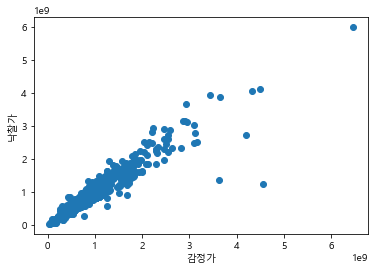

In [167]:
plt.scatter("price","hammer", data=df)
plt.xlabel("감정가")
plt.ylabel("낙찰가")

Text(0, 0.5, '낙찰가')

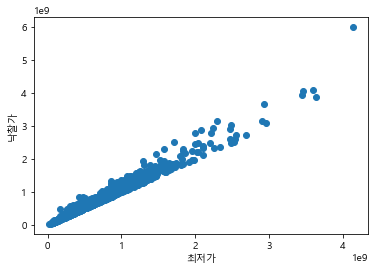

In [168]:
plt.scatter("lowest","hammer", data=df)
plt.xlabel("최저가")
plt.ylabel("낙찰가")

Text(0.5, 0, '연도')

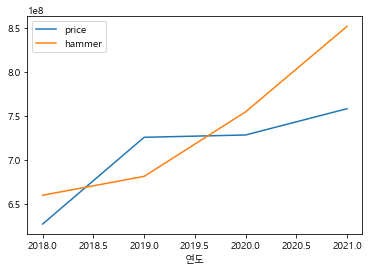

In [180]:
# 매각연도별 감정가, 낙찰가
x = df.groupby("year")["price","hammer"].mean()
x.plot()
plt.xlabel("연도")

Text(0.5, 0, '연도')

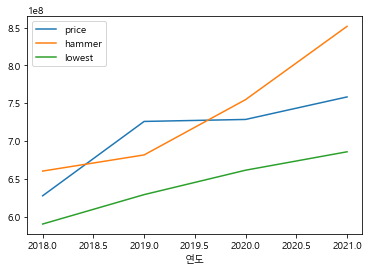

In [181]:
# 매각연도별 감정가, 낙찰가, 최저가
x = df.groupby("year")["price","hammer","lowest"].mean()
x.plot()
plt.xlabel("연도")

Text(0, 0.5, '낙찰가 비율')

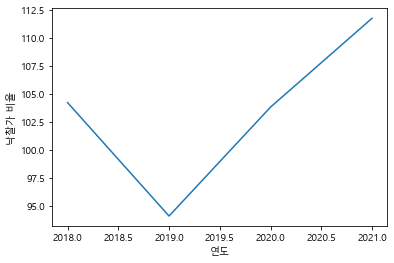

In [182]:
# 매각연도별 낙찰가 비율
x = df.groupby("year")["ham_per"].mean()
x.plot()
plt.xlabel("연도")
plt.ylabel("낙찰가 비율")

<AxesSubplot:xlabel='year,month'>

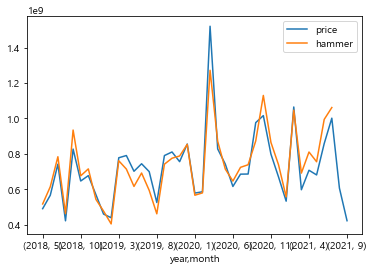

In [183]:
# 월단위로 평균낸 감정가, 낙찰가
x = df[["year","month","price","hammer"]].set_index(["year","month"])
x.groupby(["year","month"])["price","hammer"].mean().plot()

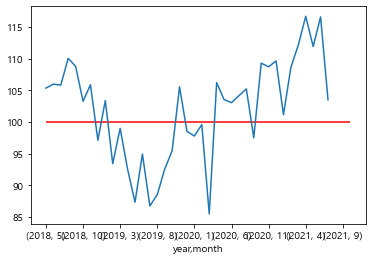

In [203]:
# 월단위로 평균낸 감정가 대비 낙찰가 비율
x = df[["year","month","ham_per"]].set_index(["year","month"])
x.groupby(["year","month"])["ham_per"].mean().plot()
plt.hlines(y=100, colors="red", xmin=0, xmax=len(x.index.unique()))

In [231]:
### 나중에 쓰일 일을 대비해서 date_ym column을 만드는 게 좋을 듯.
df["date_ym"] = df["date"].str.replace("-","").str[0:6]
df.date_ym

0       202108
1       202108
2       202108
3       202108
4       202108
         ...  
1090    201806
1091    201806
1092    201806
1093    201805
1094    201805
Name: date_ym, Length: 1095, dtype: object

<AxesSubplot:>

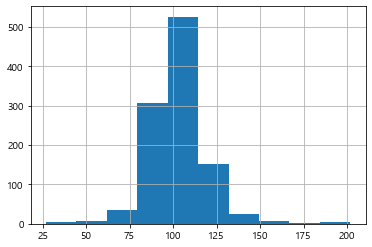

In [144]:
# 감정가 대비 낙찰가 비율
df["ham_per"].hist()

<AxesSubplot:>

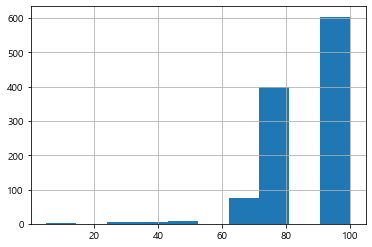

In [112]:
# 감정가 대비 최저가 비율
df["low_per"].hist()

<AxesSubplot:>

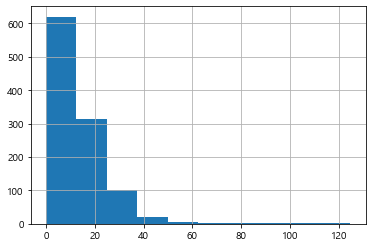

In [147]:
# 낙찰가 비율 - 최저가 비율
(df["ham_per"]-df["low_per"]).hist()

In [148]:
(df["ham_per"]-df["low_per"]).describe()

count    1067.000000
mean       12.417703
std        12.560933
min        -0.040110
25%         2.770754
50%        10.173516
75%        18.247976
max       124.630471
dtype: float64

In [113]:
df["low_per"].value_counts()

100    604
80     398
64      75
51       7
41       4
33       3
26       1
13       1
7        1
5        1
Name: low_per, dtype: int64

In [110]:
# 특수물건 건수
df["comment"].value_counts()

대항력있는임차인               135
토지및건물 지분매각              40
지분매각                    16
대지권미등기                  11
공동담보                    10
법정지상권                    7
공유물분할경매                  6
선순위전세권                   6
공유물분할경매,대항력있는임차인         4
형식적경매                    4
대항력있는임차인,선순위임차권          4
건물만매각                    2
대항력있는임차인,지분매각            2
유치권                      2
지분매각,공동담보                1
선순위가등기,선순위임차권            1
임금채권                     1
유치권에의한경매                 1
대항력있는임차인,법정지상권           1
대항력있는임차인,선순위전세권          1
대항력있는임차인,형식적경매           1
별도등기                     1
대항력있는임차인,공동담보            1
대항력있는임차인,선순위가등기          1
선순위임차권                   1
공유물분할경매,유치권              1
대항력있는임차인,재매각             1
지분매각,건물전부, 토지지분          1
대항력있는임차인,법정지상권,별도등기      1
대지권미등기,대항력있는임차인          1
Name: comment, dtype: int64

In [226]:
# 특수물건에 따른 최저가 비율(유찰과 연관)
x = pd.pivot_table(df[["low_per","comment"]], index="comment", values="low_per",aggfunc=["count","mean"])
x.sort_values(( 'mean', 'low_per'))

,count,mean
,low_per,low_per
comment,,
"대항력있는임차인,선순위전세권",1,33.000000
"대항력있는임차인,재매각",1,51.000000
"대항력있는임차인,형식적경매",1,51.000000
유치권에의한경매,1,64.000000
"대항력있는임차인,법정지상권,별도등기",1,64.000000
"지분매각,공동담보",1,64.000000
"대항력있는임차인,법정지상권",1,80.000000
유치권,2,80.000000


In [227]:
# 매각완료=1, 매각진행 중=0 인 result column 생성
def result(df):
    df["result"] = 0
    for i in range(len(df)):
        if df.loc[i, "status"] in ("매각","배당종결"):
            df.loc[i, "result"] = 1
        else:
            df.loc[i, "result"] = 0

In [228]:
result(df)

In [229]:
# 매각완료: 1067건 / 매각 진행 중: 28건
print(df["result"].value_counts())

1    1067
0      28
Name: result, dtype: int64


In [230]:
# 매각 중인 건 정보
print((df["status"].str[0:2]=="신건").value_counts())
print((df["status"].str[0:2]=="유찰").value_counts())

False    1085
True       10
Name: status, dtype: int64
False    1077
True       18
Name: status, dtype: int64


In [232]:
# 매각완료된 건만 filter
df2 = df.loc[df["result"]==1,["case_year","dong","floor_cat","build_area_cat","land","price","lowest","hammer","year","date_ym","low_per","ham_per","comment"]]
df2

,case_year,dong,floor_cat,build_area_cat,land,price,lowest,hammer,year,date_ym,low_per,ham_per,comment
28,2020,서울특별시 양천구 신월동,지하~3층,21~60m2,1,212000000,135680000,1.881000e+08,2021,202107,64,89.000000,NaN
29,2020,서울특별시 영등포구 영등포동1가,8~12층,6~20m2,1,143000000,114400000,1.206600e+08,2021,202107,80,84.000000,선순위전세권
30,2020,서울특별시 마포구 서교동,13~20층,86~150m2,1,1733000000,1733000000,1.870000e+09,2021,202107,100,108.000000,법정지상권
31,2020,서울특별시 강남구 청담동,8~12층,151m2 이상,1,3440000000,3440000000,3.953999e+09,2021,202107,100,115.000000,NaN
32,2020,서울특별시 서초구 반포동,지하~3층,151m2 이상,1,1860000000,1190400000,1.595000e+09,2021,202107,64,86.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1090,2018,서울특별시 동작구 상도동,지하~3층,86~150m2,1,938000000,938000000,1.054183e+09,2018,201806,100,112.386269,NaN
1091,2018,서울특별시 금천구 독산동,4~7층,21~60m2,1,254000000,254000000,2.541100e+08,2018,201806,100,100.043307,NaN
1092,2018,서울특별시 성북구 삼선동2가,4~7층,61~85m2,1,507000000,507000000,5.350000e+08,2018,201806,100,105.522682,NaN
1093,2018,서울특별시 중랑구 면목동,13~20층,86~150m2,1,481000000,481000000,4.890000e+08,2018,201805,100,101.663202,NaN


In [234]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1067 entries, 28 to 1094
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   case_year       1067 non-null   category
 1   dong            1067 non-null   object  
 2   floor_cat       1060 non-null   category
 3   build_area_cat  1066 non-null   category
 4   land            1067 non-null   int64   
 5   price           1067 non-null   int64   
 6   lowest          1067 non-null   int64   
 7   hammer          1067 non-null   float64 
 8   year            1067 non-null   int64   
 9   date_ym         1067 non-null   object  
 10  low_per         1067 non-null   int64   
 11  ham_per         1067 non-null   float64 
 12  comment         246 non-null    object  
dtypes: category(3), float64(2), int64(5), object(3)
memory usage: 95.3+ KB


In [237]:
df2["year"] = df2["year"].astype("category")

In [356]:
df2.to_csv("data/auction/EDA.csv", index=False)

In [238]:
df2.describe()

,land,price,lowest,hammer,low_per,ham_per
count,1067.000000,1.067000e+03,1.067000e+03,1.067000e+03,1067.000000,1067.000000
mean,0.962512,7.329734e+08,6.559703e+08,7.430876e+08,89.537020,101.958929
std,0.190044,6.153809e+08,5.224463e+08,6.005160e+08,12.931893,17.480243
min,0.000000,2.500000e+07,1.600000e+07,2.030000e+07,26.000000,27.000000
25%,1.000000,3.505000e+08,3.062000e+08,3.500555e+08,80.000000,92.000000
50%,1.000000,5.700000e+08,5.280000e+08,6.061000e+08,100.000000,102.000000
75%,1.000000,9.010000e+08,8.375000e+08,9.112200e+08,100.000000,111.000000
max,1.000000,6.470000e+09,4.140800e+09,6.011000e+09,100.000000,202.000000


In [288]:
# 건물 면적별 가격 및 가격비 평균
df2.groupby("build_area_cat").mean()

,land,price,lowest,hammer,low_per,ham_per
build_area_cat,,,,,,
6~20m2,0.984848,1.449377e+08,1.131024e+08,1.276451e+08,76.848485,88.170643
21~60m2,0.981061,4.029138e+08,3.681263e+08,4.233461e+08,89.609848,103.464603
61~85m2,0.962217,6.449433e+08,5.930780e+08,6.709935e+08,91.478589,104.136221
86~150m2,0.947581,1.000024e+09,9.113873e+08,1.026192e+09,91.245968,102.609465
151m2 이상,0.945055,1.771374e+09,1.460331e+09,1.655775e+09,85.285714,96.066289


<AxesSubplot:xlabel='build_area_cat', ylabel='price'>

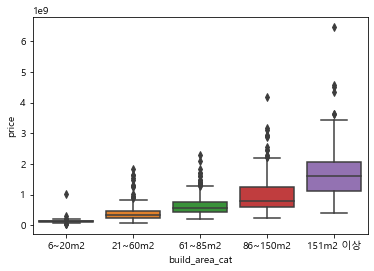

In [489]:
# 건물 면적별 감정가
sns.boxplot(data=df2, x="build_area_cat",y="price")

<AxesSubplot:xlabel='build_area_cat', ylabel='hammer'>

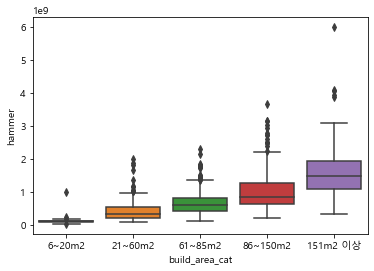

In [426]:
# 건물 면적별 낙찰가
sns.boxplot(data=df2, x="build_area_cat",y="hammer")

<AxesSubplot:xlabel='build_area_cat', ylabel='ham_per'>

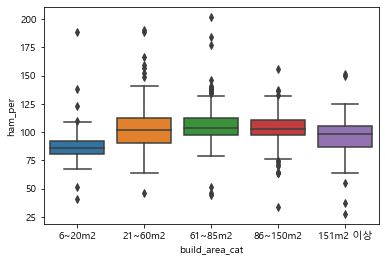

In [427]:
# 건물 면적별 감정가 대비 낙찰가 비율
sns.boxplot(data=df2, x="build_area_cat",y="ham_per")

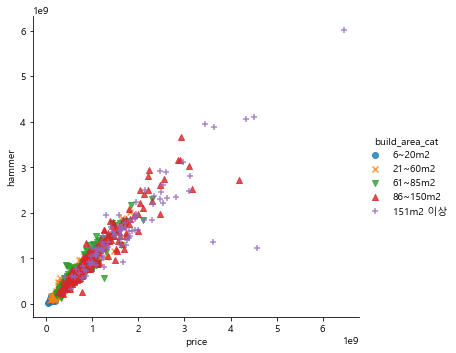

In [271]:
sns.lmplot(x="price",y="hammer",hue="build_area_cat", markers=["o","x","v","^","+"], data=df2, fit_reg=False)

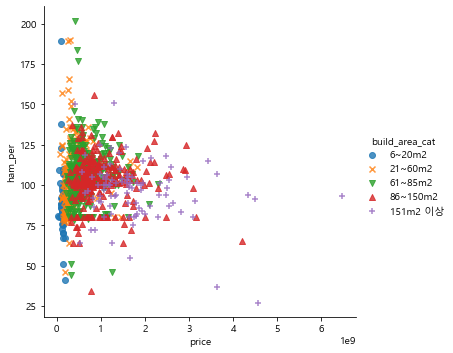

In [259]:
sns.lmplot(x="price",y="ham_per",hue="build_area_cat", markers=["o","x","v","^","+"], data=df2, fit_reg=False)

In [432]:
df2.groupby("floor_cat").mean()

,land,price,lowest,hammer,low_per,ham_per
floor_cat,,,,,,
지하~3층,0.970149,7.028638e+08,6.230491e+08,7.108886e+08,88.488806,102.114940
4~7층,0.965986,6.551624e+08,5.809540e+08,6.515402e+08,89.112245,100.988016
8~12층,0.976923,6.756496e+08,6.094969e+08,6.912038e+08,89.180769,101.124564
13~20층,0.941176,8.314840e+08,7.561733e+08,8.547653e+08,91.818182,103.654257
21층 이상,0.980392,1.333608e+09,1.187504e+09,1.358958e+09,90.607843,103.258112


<AxesSubplot:xlabel='floor_cat', ylabel='price'>

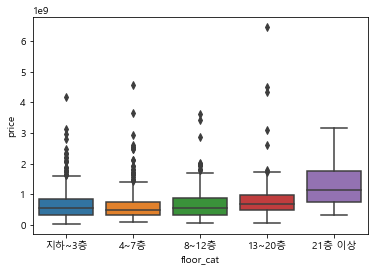

In [490]:
# 층별 감정가
sns.boxplot(data=df2, x="floor_cat",y="price")

<AxesSubplot:xlabel='floor_cat', ylabel='hammer'>

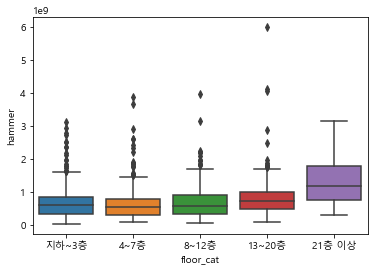

In [429]:
# 층별 낙찰가
sns.boxplot(data=df2, x="floor_cat",y="hammer")

<AxesSubplot:xlabel='floor_cat', ylabel='ham_per'>

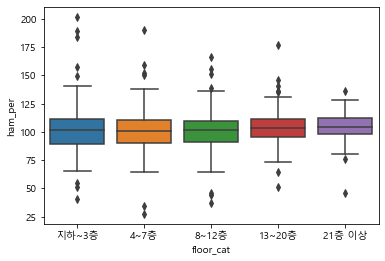

In [430]:
# 층별 감정가 대비 낙찰가 비율
sns.boxplot(data=df2, x="floor_cat",y="ham_per")

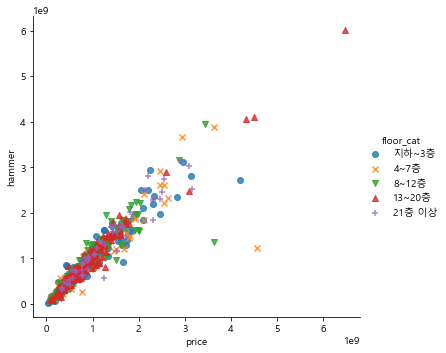

In [270]:
sns.lmplot(x="price",y="hammer",hue="floor_cat", markers=["o","x","v","^","+"], data=df2, fit_reg=False)

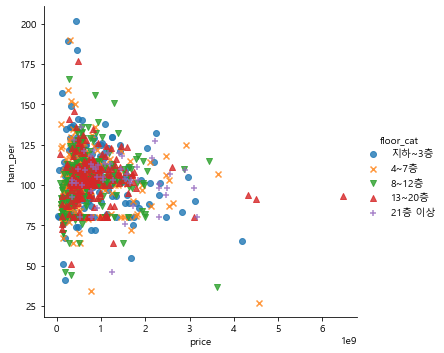

In [269]:
sns.lmplot(x="price",y="ham_per",hue="floor_cat", markers=["o","x","v","^","+"], data=df2, fit_reg=False)

<AxesSubplot:xlabel='land', ylabel='price'>

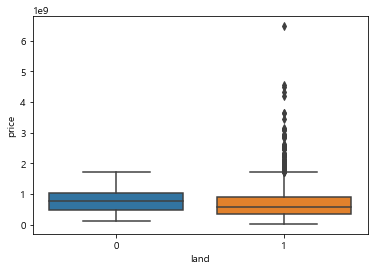

In [262]:
sns.boxplot(x="land", y="price", data=df2)

<AxesSubplot:xlabel='land', ylabel='ham_per'>

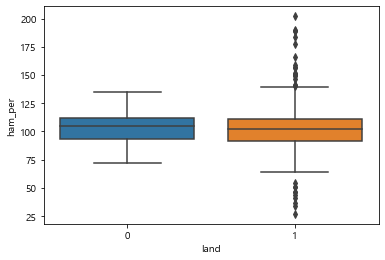

In [491]:
sns.boxplot(x="land", y="ham_per", data=df2)

<AxesSubplot:xlabel='land', ylabel='low_per'>

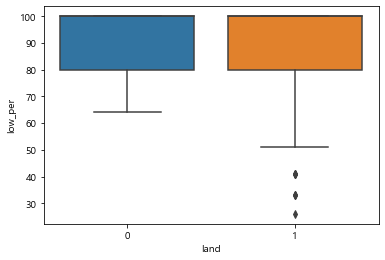

In [260]:
sns.boxplot(x="land", y="low_per", data=df2)

In [435]:
# 월평균 건물 면적별 낙찰가 비율
x = df2.pivot_table(index="date_ym",columns="build_area_cat",values="ham_per")
x

build_area_cat,6~20m2,21~60m2,61~85m2,86~150m2,151m2 이상
date_ym,,,,,
201805,NaN,109.046920,NaN,101.663202,NaN
201806,NaN,100.043307,105.522682,112.386269,NaN
201807,NaN,NaN,106.684483,104.977655,NaN
201808,NaN,120.913462,98.907909,113.860252,NaN
201809,NaN,78.723404,116.010228,111.086747,111.887451
201810,NaN,96.744941,103.589008,106.090995,NaN
201811,97.947368,NaN,116.605166,106.513898,101.270718
201812,83.000000,104.636757,103.371993,100.487342,80.772222
201901,NaN,97.913113,112.132894,99.632530,108.215168


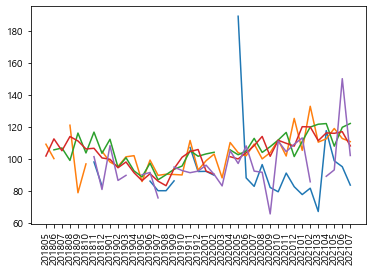

In [437]:
plt.plot(x)
plt.xticks(rotation = 'vertical')
plt.show()

In [ ]:
area = df2.build_area_cat.unique()[:-1].sort_values()

건물 면적에 따른 월별 낙찰가 비율
*건물 면적:  6~20m2


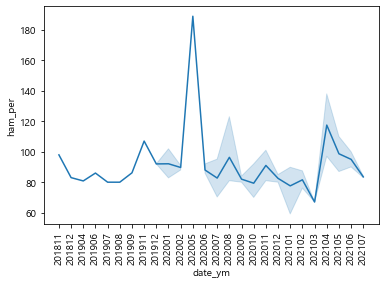

In [444]:
print("건물 면적에 따른 월별 낙찰가 비율")
print("*건물 면적: ", area[0])
sns.lineplot("date_ym","ham_per",data=df2.loc[df2["build_area_cat"]==area[0]].sort_values("date_ym"))
plt.xticks(rotation = 'vertical')
plt.show()

건물 면적에 따른 월별 낙찰가 비율
*건물 면적:  21~60m2


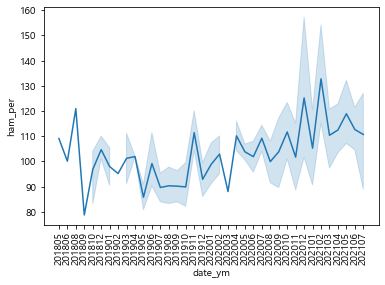

In [445]:
print("건물 면적에 따른 월별 낙찰가 비율")
print("*건물 면적: ", area[1])
sns.lineplot("date_ym","ham_per",data=df2.loc[df2["build_area_cat"]==area[1]].sort_values("date_ym"))
plt.xticks(rotation = 'vertical')
plt.show()

건물 면적에 따른 월별 낙찰가 비율
*건물 면적:  61~85m2


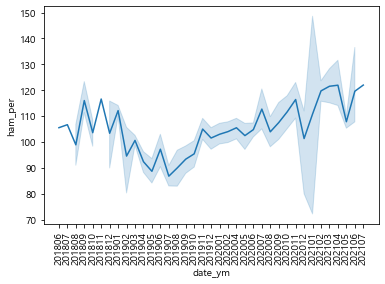

In [446]:
print("건물 면적에 따른 월별 낙찰가 비율")
print("*건물 면적: ", area[2])
sns.lineplot("date_ym","ham_per",data=df2.loc[df2["build_area_cat"]==area[2]].sort_values("date_ym"))
plt.xticks(rotation = 'vertical')
plt.show()

건물 면적에 따른 월별 낙찰가 비율
*건물 면적:  86~150m2


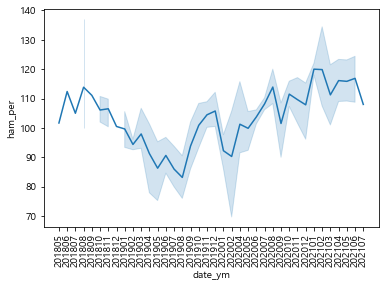

In [447]:
print("건물 면적에 따른 월별 낙찰가 비율")
print("*건물 면적: ", area[3])
sns.lineplot("date_ym","ham_per",data=df2.loc[df2["build_area_cat"]==area[3]].sort_values("date_ym"))
plt.xticks(rotation = 'vertical')
plt.show()

건물 면적에 따른 월별 낙찰가 비율
*건물 면적:  151m2 이상


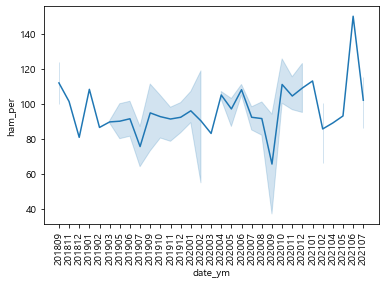

In [448]:
print("건물 면적에 따른 월별 낙찰가 비율")
print("*건물 면적: ", area[4])
sns.lineplot("date_ym","ham_per",data=df2.loc[df2["build_area_cat"]==area[4]].sort_values("date_ym"))
plt.xticks(rotation = 'vertical')
plt.show()

In [308]:
# 위치 및 건물 면적별 건수
x = df2.pivot_table(index="dong", columns="build_area_cat",values="price", aggfunc="count", margins=True)

build_area_cat,6~20m2,21~60m2,61~85m2,86~150m2,151m2 이상,All
dong,,,,,,
서울특별시 강남구 개포동,NaN,1.0,1.0,NaN,3.0,5
서울특별시 강남구 논현동,NaN,NaN,NaN,2.0,NaN,2
서울특별시 강남구 대치동,NaN,NaN,1.0,4.0,NaN,5
서울특별시 강남구 도곡동,NaN,1.0,NaN,5.0,2.0,8
서울특별시 강남구 삼성동,NaN,2.0,NaN,3.0,3.0,8
...,...,...,...,...,...,...
서울특별시 중랑구 묵동,NaN,3.0,NaN,1.0,NaN,4
서울특별시 중랑구 상봉동,NaN,NaN,1.0,NaN,NaN,1
서울특별시 중랑구 신내동,1.0,2.0,5.0,4.0,NaN,12


In [313]:
x = x.iloc[:-1,:].sort_values("All", ascending=False) # column total 제외하고 sorting
x

<AxesSubplot:ylabel='dong'>

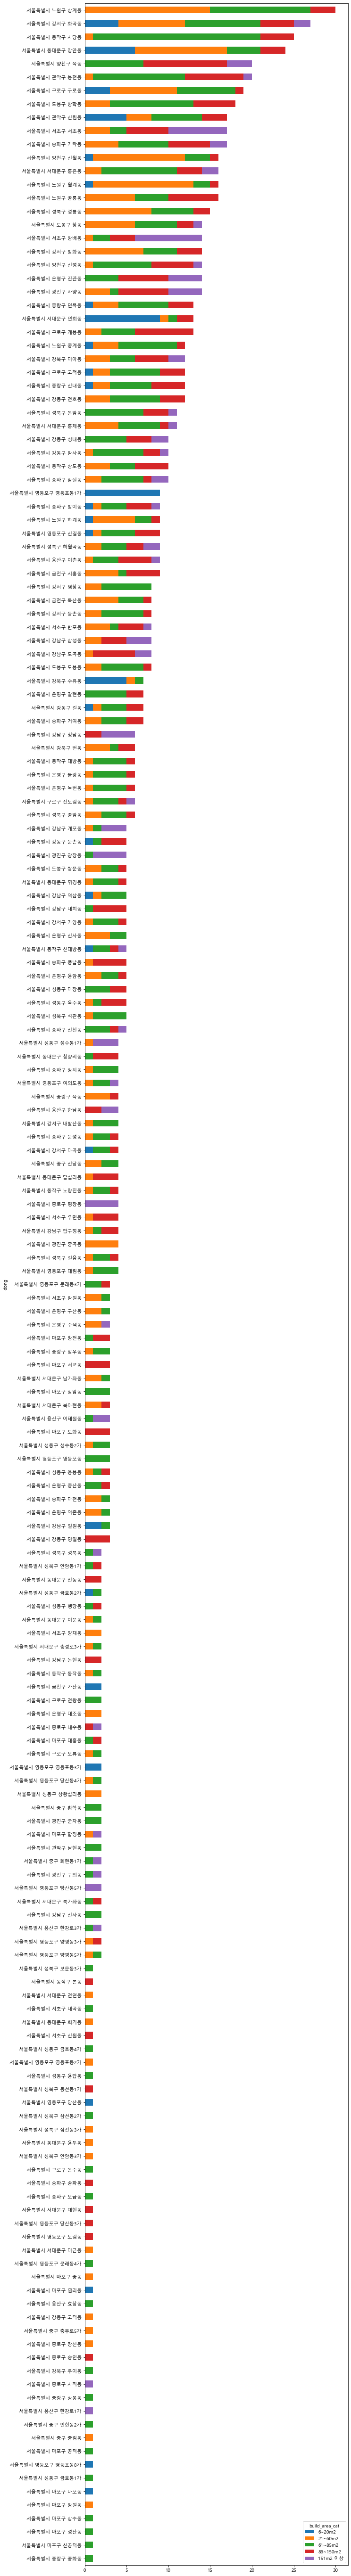

In [318]:
# total column 제외하고 bar plot 그리기
x.sort_values("All").iloc[:,:-1].plot(kind="barh", stacked=True,figsize=(10,100))

In [471]:
# 면적별 감정가 평균(아파트 위치 순)
x = df2.pivot_table(index=["dong","build_area_cat"], values="price", aggfunc="mean")
x

price
dong          build_area_cat              
서울특별시 강남구 개포동 21~60m2         1.650000e+09
              61~85m2         1.420000e+09
              151m2 이상        1.963333e+09
서울특별시 강남구 논현동 86~150m2        8.665000e+08
서울특별시 강남구 대치동 61~85m2         1.070000e+09
...                                    ...
서울특별시 중랑구 신내동 6~20m2          8.750000e+07
              21~60m2         2.190000e+08
              61~85m2         5.214000e+08
              86~150m2        4.577500e+08
서울특별시 중랑구 중화동 61~85m2         4.000000e+08

[424 rows x 1 columns]

In [289]:
# 면적별 낙찰가 비율 평균(아파트 위치 순)
x = df2.pivot_table(index=["dong","build_area_cat"], values="ham_per", aggfunc="mean")
x

ham_per
dong          build_area_cat            
서울특별시 강남구 개포동 21~60m2         115.000000
              61~85m2         125.000000
              151m2 이상        105.333333
서울특별시 강남구 논현동 86~150m2         97.743966
서울특별시 강남구 대치동 61~85m2         120.000000
...                                  ...
서울특별시 중랑구 신내동 6~20m2           86.148571
              21~60m2         112.729324
              61~85m2          99.600000
              86~150m2        103.000000
서울특별시 중랑구 중화동 61~85m2          92.925000

[424 rows x 1 columns]

In [476]:
# 건물 면적별 감정가 평균이 가장 높은 동네
x = df2.pivot_table(index=["build_area_cat","dong"], values=["price","ham_per","hammer"], aggfunc="mean")
x.sort_values(by="price", ascending=False)

ham_per        hammer         price
build_area_cat dong                                                   
151m2 이상       서울특별시 강남구 청담동     81.250000  3.499000e+09  4.401000e+09
               서울특별시 성동구 성수동1가   74.000000  3.171667e+09  4.153333e+09
               서울특별시 용산구 한남동     95.000000  3.115550e+09  3.230000e+09
86~150m2       서울특별시 강남구 대치동    105.000000  2.700607e+09  2.597250e+09
               서울특별시 서초구 반포동     91.333333  2.062000e+09  2.500000e+09
...                                    ...           ...           ...
6~20m2         서울특별시 중랑구 신내동     86.148571  7.538000e+07  8.750000e+07
               서울특별시 노원구 중계동    123.000000  1.031000e+08  8.400000e+07
               서울특별시 구로구 고척동    101.000000  7.310000e+07  7.258800e+07
               서울특별시 양천구 신월동     80.000000  4.333000e+07  5.400000e+07
               서울특별시 노원구 하계동    109.000000  5.425980e+07  5.000000e+07

[424 rows x 3 columns]

In [477]:
# 감정가 평균이 중간인 동네(건물 면적별)
for i in area:
    print("건물 면적: ",i)
    print(x.loc[i].sort_values(by="price")[len(x.loc[i])//2-3:len(x.loc[i])//2+2])
    print("-------------------------------------\n")

건물 면적:  6~20m2
                     ham_per       hammer         price
dong                                                   
서울특별시 영등포구 영등포동3가  90.500000  112800000.0  1.250000e+08
서울특별시 동대문구 장안동     84.277778  105718166.5  1.253333e+08
서울특별시 강동구 길동       81.000000  102000010.0  1.260000e+08
서울특별시 영등포구 영등포동8가  76.000000   96100000.0  1.270000e+08
서울특별시 관악구 신림동      91.800000  121414460.6  1.324000e+08
-------------------------------------

건물 면적:  21~60m2
                    ham_per        hammer         price
dong                                                   
서울특별시 노원구 중계동     90.356667  3.178344e+08  3.483333e+08
서울특별시 영등포구 여의도동  100.000000  3.500000e+08  3.500000e+08
서울특별시 강남구 역삼동     90.000000  3.251111e+08  3.600000e+08
서울특별시 구로구 고척동    106.821291  3.851449e+08  3.615000e+08
서울특별시 구로구 신도림동    80.000000  2.992000e+08  3.740000e+08
-------------------------------------

건물 면적:  61~85m2
                  ham_per        hammer         price
dong                                 

In [480]:
# 감정가 평균이 가장 높은 동네(건물 면적별)
for i in area:
    print("건물 면적: ",i)
    print(x.loc[i].sort_values(by="price", ascending=False).head())
    print("-------------------------------------\n")

건물 면적:  6~20m2
                 ham_per       hammer        price
dong                                              
서울특별시 강남구 일원동      100.5  590005000.0  589500000.0
서울특별시 성동구 금호동2가     91.0  260000000.0  286000000.0
서울특별시 강남구 역삼동       85.0  180000000.0  211000000.0
서울특별시 송파구 방이동       87.0  177800000.0  205000000.0
서울특별시 마포구 염리동      107.0  182600000.0  171000000.0
-------------------------------------

건물 면적:  21~60m2
                ham_per        hammer         price
dong                                               
서울특별시 강남구 개포동     115.0  1.890000e+09  1.650000e+09
서울특별시 강남구 압구정동    111.0  1.815000e+09  1.640000e+09
서울특별시 서초구 잠원동      93.5  1.350615e+09  1.425000e+09
서울특별시 강동구 고덕동     106.0  1.362511e+09  1.290000e+09
서울특별시 송파구 잠실동      80.0  8.920000e+08  1.115000e+09
-------------------------------------

건물 면적:  61~85m2
                    ham_per        hammer         price
dong                                                   
서울특별시 서초구 반포동    100.391304  2.309000e+09 

In [466]:
# 낙찰가 비율 평균이 중간인 동네(건물 면적별)
for i in area:
    print("건물 면적: ",i)
    print(x.loc[i].sort_values(by="ham_per")[len(x.loc[i])//2-3:len(x.loc[i])//2+2])
    print("-------------------------------------\n")

건물 면적:  6~20m2
                   ham_per       hammer        price
dong                                                
서울특별시 강서구 화곡동        86.75   82316250.0   95000000.0
서울특별시 송파구 방이동        87.00  177800000.0  205000000.0
서울특별시 영등포구 당산동       90.00  121808000.0  136000000.0
서울특별시 영등포구 영등포동3가    90.50  112800000.0  125000000.0
서울특별시 성동구 금호동2가      91.00  260000000.0  286000000.0
-------------------------------------

건물 면적:  21~60m2
                     ham_per        hammer         price
dong                                                    
서울특별시 성북구 석관동     104.000000  2.811000e+08  2.690000e+08
서울특별시 서대문구 충정로3가  104.000000  2.256700e+08  2.170000e+08
서울특별시 양천구 신월동     104.727273  2.993263e+08  2.740909e+08
서울특별시 도봉구 창동      105.854167  3.550817e+08  3.260000e+08
서울특별시 서초구 방배동     106.000000  6.378870e+08  6.000000e+08
-------------------------------------

건물 면적:  61~85m2
                     ham_per        hammer         price
dong                                            

In [479]:
# 낙찰가 비율 평균이 가장 낮은 동네(건물 면적별)
for i in area:
    print("건물 면적: ",i)
    print(x.loc[i].sort_values(by="ham_per").head())
    print("-------------------------------------\n")

건물 면적:  6~20m2
                     ham_per        hammer         price
dong                                                    
서울특별시 서대문구 연희동     72.662210  1.220303e+08  1.676667e+08
서울특별시 영등포구 영등포동8가  76.000000  9.610000e+07  1.270000e+08
서울특별시 영등포구 영등포동1가  78.000000  1.101067e+08  1.410000e+08
서울특별시 구로구 구로동      79.666667  7.405667e+07  9.366667e+07
서울특별시 양천구 신월동      80.000000  4.333000e+07  5.400000e+07
-------------------------------------

건물 면적:  21~60m2
                  ham_per       hammer         price
dong                                                
서울특별시 강북구 수유동   78.723404  111000000.0  1.410000e+08
서울특별시 강남구 도곡동   80.000000  450400000.0  5.630000e+08
서울특별시 동대문구 이문동  80.000000  392000000.0  4.900000e+08
서울특별시 구로구 신도림동  80.000000  299200000.0  3.740000e+08
서울특별시 송파구 잠실동   80.000000  892000000.0  1.115000e+09
-------------------------------------

건물 면적:  61~85m2
                  ham_per        hammer        price
dong                                                

In [398]:
# 건물 면적별 최저가 비율 평균이 가장 낮은 동네
x = df2.pivot_table(index=["build_area_cat","dong"], values="low_per", aggfunc="mean")
x.sort_values(by="low_per").head(20)

low_per
build_area_cat dong                        
6~20m2         서울특별시 강동구 길동       51.000000
151m2 이상       서울특별시 강남구 청담동      63.500000
86~150m2       서울특별시 은평구 증산동      64.000000
21~60m2        서울특별시 강북구 수유동      64.000000
61~85m2        서울특별시 강북구 우이동      64.000000
               서울특별시 중구 회현동1가     64.000000
6~20m2         서울특별시 영등포구 영등포동8가  64.000000
               서울특별시 성동구 금호동2가    64.000000
151m2 이상       서울특별시 서대문구 홍제동     64.000000
               서울특별시 서초구 반포동      64.000000
               서울특별시 송파구 신천동      64.000000
86~150m2       서울특별시 서대문구 연희동     64.000000
6~20m2         서울특별시 구로구 구로동      64.000000
21~60m2        서울특별시 성북구 석관동      64.000000
151m2 이상       서울특별시 성동구 성수동1가    64.333333
6~20m2         서울특별시 서대문구 연희동     64.555556
151m2 이상       서울특별시 용산구 이태원동     65.500000
86~150m2       서울특별시 강동구 천호동      65.666667
151m2 이상       서울특별시 종로구 평창동      68.750000
86~150m2       서울특별시 서대문구 홍은동     69.333333

In [ ]:
## 최최최저가
for i in area:
    print("건물 면적: ",i)
    print(x.loc[i].sort_values(by="ham_per").head())
    print("-------------------------------------\n")

In [ ]:
# 최저가는 유찰횟수와 관련있음
#######유찰되는 원인#######
# 1. 건물 면적이 너무 작거나 큰 경우
# 2. 동네?
# 3. 특수물건?

In [363]:
# 구 단위로 나눠서 보자.
df2["gu"] = df2["dong"].str.split().str[1]

build_area_cat,6~20m2,21~60m2,61~85m2,86~150m2,151m2 이상,All
gu,,,,,,
노원구,3.0,41.0,27.0,12.0,NaN,83
강서구,5.0,21.0,32.0,10.0,2.0,70
송파구,1.0,14.0,27.0,18.0,6.0,66
성북구,NaN,16.0,28.0,11.0,4.0,59
은평구,NaN,15.0,25.0,12.0,5.0,57
구로구,4.0,14.0,24.0,12.0,1.0,55
동작구,1.0,7.0,32.0,12.0,1.0,53
서대문구,9.0,14.0,18.0,9.0,3.0,53
양천구,1.0,12.0,17.0,16.0,4.0,50


In [ ]:
x = df2.pivot_table(index="gu", columns="build_area_cat",values="price", aggfunc="count", margins=True)
x = x.iloc[:-1,:].sort_values("All", ascending=False)
x

<AxesSubplot:ylabel='gu'>

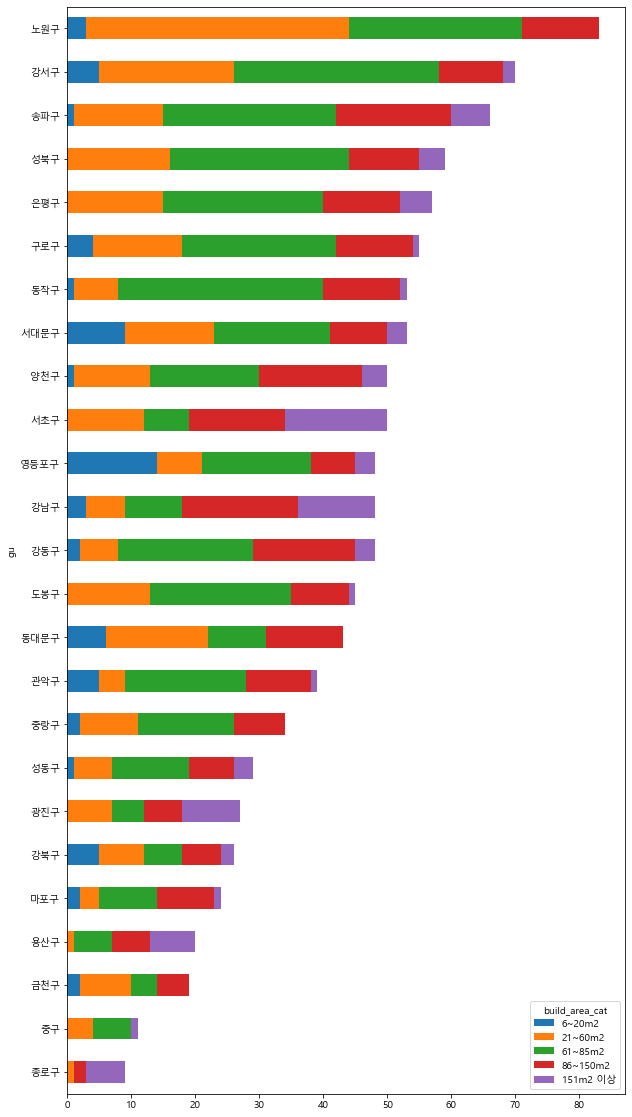

In [364]:
x.sort_values("All").iloc[:,:-1].plot(kind="barh", stacked=True,figsize=(10,20))

In [469]:
# 건물 면적별 낙찰가 비율 평균이 가장 높은 구
x = df2.pivot_table(index=["build_area_cat","gu"], values=["price","hammer","ham_per"], aggfunc="mean")
x.sort_values(by="ham_per", ascending=False)

ham_per        hammer         price
build_area_cat gu                                          
6~20m2         노원구   140.333333  1.091233e+08  7.466667e+07
21~60m2        용산구   125.000000  1.500000e+08  1.200000e+08
151m2 이상       강북구   123.000000  6.424150e+08  5.565000e+08
               도봉구   118.771028  7.625100e+08  6.420000e+08
21~60m2        마포구   116.333333  3.616997e+08  3.040000e+08
...                         ...           ...           ...
6~20m2         영등포구   82.571429  1.138906e+08  1.380000e+08
               양천구    80.000000  4.333000e+07  5.400000e+07
151m2 이상       서대문구   77.000000  5.209183e+08  6.776667e+08
               성동구    74.000000  3.171667e+09  4.153333e+09
6~20m2         서대문구   72.662210  1.220303e+08  1.676667e+08

[111 rows x 3 columns]

In [470]:
# 낙찰가 비율 평균이 중간인 동네(건물 면적별)
for i in area:
    print("건물 면적: ",i)
    print(x.loc[i].sort_values(by="ham_per")[len(x.loc[i])//2-3:len(x.loc[i])//2+2])
    print("-------------------------------------\n")

건물 면적:  6~20m2
        ham_per       hammer         price
gu                                        
동대문구  84.277778  105718166.5  1.253333e+08
구로구   85.000000   73817500.0  8.839700e+07
송파구   87.000000  177800000.0  2.050000e+08
강서구   88.000000   94431000.0  1.066000e+08
성동구   91.000000  260000000.0  2.860000e+08
-------------------------------------

건물 면적:  21~60m2
        ham_per        hammer         price
gu                                         
성북구  102.641908  3.813784e+08  3.651562e+08
도봉구  103.309772  2.902749e+08  2.740769e+08
서초구  103.949145  9.210248e+08  8.900311e+08
강동구  104.695122  5.181513e+08  4.897500e+08
금천구  104.896631  3.257081e+08  3.105000e+08
-------------------------------------

건물 면적:  61~85m2
         ham_per        hammer         price
gu                                          
강남구   103.474565  1.087304e+09  1.050222e+09
영등포구  103.694995  7.257997e+08  6.957059e+08
도봉구   103.774156  3.900370e+08  3.710000e+08
중랑구   104.061667  5.014955e+08  4.824667e

In [411]:
x.loc[area[0]]

,ham_per,price
gu,,
강남구,95.333333,4.633333e+08
강동구,109.500000,1.120000e+08
강북구,83.565138,1.053600e+08
강서구,88.000000,1.066000e+08
관악구,91.800000,1.324000e+08
구로구,85.000000,8.839700e+07
금천구,83.000000,1.235000e+08
노원구,140.333333,7.466667e+07
동대문구,84.277778,1.253333e+08


구별 감정가 vs 낙찰가 비율 평균
*건물 면적:  6~20m2


<AxesSubplot:xlabel='price', ylabel='ham_per'>

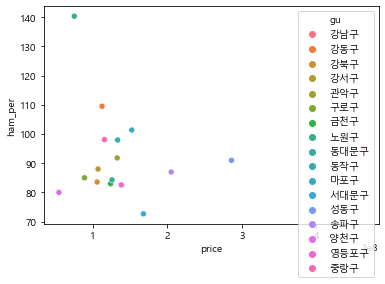

In [413]:
print("구별 감정가 vs 낙찰가 비율 평균")
print("*건물 면적: ", area[0])
sns.scatterplot(data=x.loc[(area[0],)],x="price", y="ham_per",hue="gu")

<AxesSubplot:xlabel='price', ylabel='ham_per'>

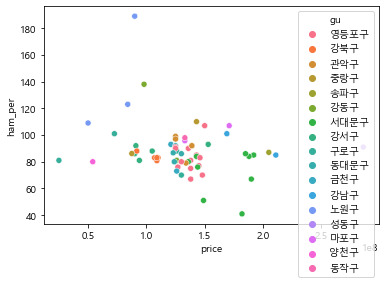

In [416]:
# 전체
sns.scatterplot(data=df2.loc[(df2["build_area_cat"]==area[0])&(df2["price"]<400000000)],x="price", y="ham_per",hue="gu")

구별 감정가 vs 낙찰가 비율 평균
*건물 면적:  21~60m2


<AxesSubplot:xlabel='price', ylabel='ham_per'>

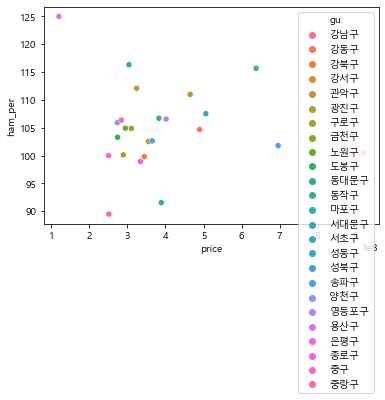

In [417]:
print("구별 감정가 vs 낙찰가 비율 평균")
print("*건물 면적: ", area[1])
sns.scatterplot(data=x.loc[(area[1],)],x="price", y="ham_per",hue="gu")

<AxesSubplot:xlabel='price', ylabel='ham_per'>

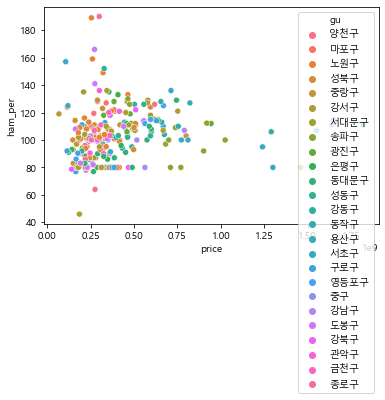

In [419]:
# 전체
sns.scatterplot(data=df2.loc[(df2["build_area_cat"]==area[1])],x="price", y="ham_per",hue="gu")

구별 감정가 vs 낙찰가 비율 평균
*건물 면적:  61~85m2


<AxesSubplot:xlabel='price', ylabel='ham_per'>

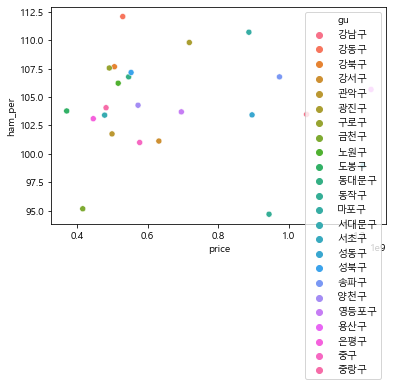

In [420]:
print("구별 감정가 vs 낙찰가 비율 평균")
print("*건물 면적: ", area[2])
sns.scatterplot(data=x.loc[(area[2],)],x="price", y="ham_per",hue="gu")

<AxesSubplot:xlabel='price', ylabel='ham_per'>

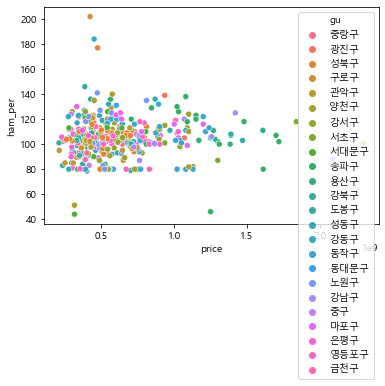

In [421]:
# 전체
sns.scatterplot(data=df2.loc[(df2["build_area_cat"]==area[2])],x="price", y="ham_per",hue="gu")

구별 감정가 vs 낙찰가 비율 평균
*건물 면적:  86~150m2


<AxesSubplot:xlabel='price', ylabel='ham_per'>

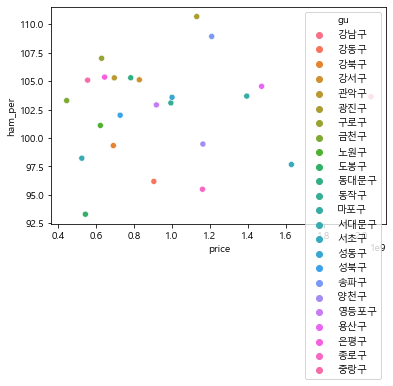

In [422]:
print("구별 감정가 vs 낙찰가 비율 평균")
print("*건물 면적: ", area[3])
sns.scatterplot(data=x.loc[(area[3],)],x="price", y="ham_per",hue="gu")

<AxesSubplot:xlabel='price', ylabel='ham_per'>

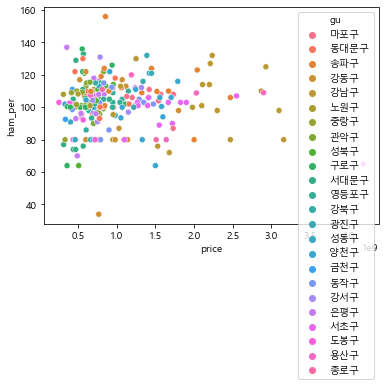

In [423]:
# 전체
sns.scatterplot(data=df2.loc[(df2["build_area_cat"]==area[3])],x="price", y="ham_per",hue="gu")

# 실거래가 데이터

In [2]:
df = pd.read_csv("../data/transaction/transaction_appended.csv")
df

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
280998,27505,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,14,한신2,59.76,660000000,2021,3,18,1998,24,동일로 752
280999,27506,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,6,한신2,59.76,660000000,2021,4,10,1998,24,동일로 752
281000,27507,450.0,0.0,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,13,한신2,59.76,680000000,2021,4,16,1998,24,동일로 752
281001,27508,274.0,51.0,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-51,5,한영(101),57.66,300000000,2021,2,27,2003,19,동일로144길 74


In [3]:
df = df.loc[:, "addr":]
df.tail()

,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name
280998,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,14,한신2,59.76,660000000,2021,3,18,1998,24,동일로 752
280999,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,6,한신2,59.76,660000000,2021,4,10,1998,24,동일로 752
281000,서울특별시 중랑구 중화동 450,서울특별시 중랑구 동일로 752,서울특별시 중랑구 중화동,450,13,한신2,59.76,680000000,2021,4,16,1998,24,동일로 752
281001,서울특별시 중랑구 중화동 274-51,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-51,5,한영(101),57.66,300000000,2021,2,27,2003,19,동일로144길 74
281002,서울특별시 중랑구 중화동 274-75,서울특별시 중랑구 동일로144길 74,서울특별시 중랑구 중화동,274-75,4,한영(102),72.22,490000000,2021,5,4,2003,19,동일로144길 74


In [21]:
df.to_excel("data/transaction/transaction_확인용.xlsx", index=False)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 281003 entries, 0 to 281002
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   addr            280853 non-null  object 
 1   load_addr       281003 non-null  object 
 2   dong            281003 non-null  object 
 3   bunji           280853 non-null  object 
 4   floor           281003 non-null  int64  
 5   brand           281003 non-null  object 
 6   build_area      281003 non-null  float64
 7   price           281003 non-null  int64  
 8   contract_year   281003 non-null  int64  
 9   contract_month  281003 non-null  int64  
 10  contract_day    281003 non-null  int64  
 11  year_built      281003 non-null  int64  
 12  years_use       281003 non-null  int64  
 13  load_name       281003 non-null  object 
dtypes: float64(1), int64(7), object(6)
memory usage: 30.0+ MB


In [3]:
x = df[["load_addr","brand"]]
n1 = x.groupby("load_addr").count()
n2 = x.groupby("brand").count()

In [4]:
n1

,brand
load_addr,
서울특별시 강남구 강남대로 240,33
서울특별시 강남구 강남대로 256,32
서울특별시 강남구 강남대로 272,6
서울특별시 강남구 강남대로 324,9
서울특별시 강남구 강남대로112길 41,17
...,...
서울특별시 중랑구 중랑천로12길 17,1
서울특별시 중랑구 중랑천로14길 34,25
서울특별시 중랑구 중랑천로14길 58,30


In [5]:
n2

,load_addr
brand,
(1-102),4
(1101-1),48
(13-21),4
(1546-0),2
(1617-21),1
...,...
힐튼빌리지1차,1
힐튼빌리지2차,3
힐하우스,2


(array([7.40400e+04, 1.19582e+05, 6.63790e+04, 1.67300e+04, 2.95300e+03,
        9.14000e+02, 2.55000e+02, 8.50000e+01, 4.10000e+01, 2.40000e+01]),
 array([-3. ,  4.2, 11.4, 18.6, 25.8, 33. , 40.2, 47.4, 54.6, 61.8, 69. ]),
 <BarContainer object of 10 artists>)

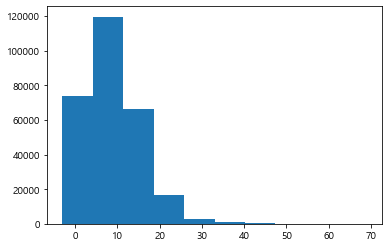

In [17]:
plt.hist(df["floor"])

In [3]:
df["floor_cat"] = pd.cut(df["floor"], bins=[-3,3,7,12,20,70],labels=["지하~3층","4~7층","8~12층","13~20층","20층 이상"])
df.head()

,Unnamed: 0,본번,부번,addr,load_addr,dong,bunji,floor,brand,build_area,price,contract_year,contract_month,contract_day,year_built,years_use,load_name,floor_cat
0,0,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,4,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,3,1987,35,언주로 3,4~7층
1,1,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,2,개포6차우성아파트1동~8동,79.97,1170000000,2018,1,8,1987,35,언주로 3,지하~3층
2,2,658.0,1.0,서울특별시 강남구 개포동 658-1,서울특별시 강남구 언주로 3,서울특별시 강남구 개포동,658-1,1,개포6차우성아파트1동~8동,79.97,1300000000,2018,1,11,1987,35,언주로 3,지하~3층
3,3,652.0,0.0,서울특별시 강남구 개포동 652,서울특별시 강남구 개포로 307,서울특별시 강남구 개포동,652,12,개포우성3차,161.00,2100000000,2018,1,10,1984,38,개포로 307,8~12층
4,4,12.0,2.0,서울특별시 강남구 개포동 12-2,서울특별시 강남구 개포로109길 69,서울특별시 강남구 개포동,12-2,16,개포자이(12-2),170.32,1620000000,2018,1,2,2004,18,개포로109길 69,13~20층


In [4]:
df.pivot_table(index=["load_addr","build_area"],columns=["floor_cat"],values="price", aggfunc="mean")

MemoryError: 

In [ ]:
df.pivot_table(columns=[""])

In [22]:
tmp = pd.read_csv("data/transaction/실거래가_전체.csv")
tmp.to_excel("data/transaction/실거래가_확인용.xlsx", index=False)